# Project Introduction #


Our project, titled *Digging Into Crime in LA*, is the analysis of crime data in Los Angeles from 2010 to 2023.  The primary objective of this project is to extract meaningful patterns, trends, and insights from the data that can inform various stakeholders, including law enforcement agencies, city planners, and the general public.

It is particularly focused on investigating the impact of California's high spending on policing and corrections on crime rates in LA. We are leveraging a dataset that includes information about grant funding from the Department of Homeland Security in Los Angeles. This dataset provides insights into the financial resources allocated for security and law enforcement in the city, crime-prone geographic areas, premises associated with reported crimes, and an assessment of the effectiveness of preventive initiatives.

For law enforcement, our analysis aims to identify the most common crimes,and the areas with the highest crime rates. This information can help law enforcement agencies plan better, allocate resources more effectively, and develop strategies to prevent crime.

For city planners, we are mapping out where crimes occur. This information can guide decisions about improving infrastructure such as street lighting and surveillance cameras, and inform the planning of public spaces. It can also be used when deciding where to build new houses, shops, or parks.

For the public, our project aims to increase awareness of crime trends and safety in their city. By understanding the patterns and trends in crime data, residents can make informed decisions about their safety and contribute to community discussions about crime prevention and community safety.

Our project involves several stages, including data acquisition, data cleaning, exploratory data analysis, and the development of visualizations to communicate our findings.

# Choice for heavier grading #

### Emphasis on Data Analysis in Our Project ###

For our project "Digging Into Crime in LA," we believe the data analysis part deserves more attention in grading.

#### Why Our Data Analysis Stands Out ####

1. **Detailed Time and Place Study**: We didn't just count crimes over the years. We looked closely at when/where crimes happened over 13 years. This meant figuring out if certain times of the day, seasons, and years had more crimes, and why that might be. We also used mapping to show where in the city most crimes were happening.

2. **Who's Affected**: We went beyond numbers and looked at who the crimes were affecting. To do this we needed to understand how different groups of people, of different ages or ethnicities, experienced crime within La. We also saw how crime differed in other parts of the city, considering things like income levels and community composition.

3. **Linking Crime with Funding Data**: A very important part of our analysis was combining crime data with information about money given for safety and law enforcement. We checked if the money being spent was making a difference in reducing crime. This step needed us to think about how money, safety, and community go hand in hand together.

4. **Predictions and Suggestions for the Future**: We also tried to guess future crime trends based on what we found. This helps in making better plans and decisions for the city’s safety. To do this, we used more advanced methods to predict and give suggestions.

5. **Making Data Easy to Understand**: We put a lot of effort into making our findings clear and interesting through visuals. It’s not just about showing data; it's about telling a story that people can understand and relate to. Especially those who find value in derived information and know how it's derived.


# Data Acquisition and  Data Cleaning  #

We acquired our datasets for this project from the Los Angeles City Website, from the following URLs


https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8


https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z

Lets look into what the actual datasets, its descriptions are and the processes involved in the cleaning.

## Dataset Descriptions ##

**LA_Crime_Data_from_2010_to_2019**
- CSV format
- 2,135,615 rows
- 28 columns with details on crime occurrences.

*This dataset provides information about crimes reported in Los Angeles from 2010 to 2019, including the type of crime, when and where it occurred, and the status of the investigation.*

---

**LA_Crime_Data_from_2020_to_2023**
- CSV format
- 815,882 rows
- 28 columns with crime information (as of October 12, 2023).

*This dataset provides information about crimes reported in Los Angeles from 2020 to 2023, including the type of crime, when and where it occurred, and the status of the investigation.*

---

**Los Angeles Grants Funding**
- CSV format
- 40 rows
- 7 columns with crime prevention fund records.

*This dataset provides information about grant funds allocated and was provided to city of Los Angeles through programs and initatives.*

## Datasets Columns Information ##

**LA_Crime_Data_from_2010_to_2019** & **LA_Crime_Data_from_2020_to_2023**

1. `DR_NO`: The unique identifier for the crime report.

2. `Date Rptd`: The date the crime was reported, represented in the format 'MM/DD/YYYY HH:MM:SS AM/PM'.

3. `DATE OCC`: The date the crime occurred, represented in the format 'MM/DD/YYYY HH:MM:SS AM/PM'.

4. `TIME OCC`: The time the crime occurred, represented as a 24-hour clock time.

5. `AREA`: The numeric code for the area where the crime occurred.

6. `AREA NAME`: The name of the area where the crime occurred.

7. `Rpt Dist No`: The reporting district number.

8. `Part 1-2`: The Part I or Part II crime classification (Part I crimes are major crimes like murder, rape, and robbery, while Part II crimes are all other crimes).

9. `Crm Cd`: The crime code.

10. `Crm Cd Desc`: The description of the crime.

11. `Status Desc`: The status of the crime (e.g., 'Adult Arrest', 'Invest Cont').

12. `Crm Cd 1`, `Crm Cd 2`, `Crm Cd 3`, `Crm Cd 4`: Additional crime codes if multiple crimes were reported in the same incident.

13. `LOCATION`: The location where the crime occurred.

14. `Cross Street`: The cross street near where the crime occurred.

15. `LAT`: The latitude of the crime location.

16. `LON`: The longitude of the crime location.

17. `AREA`: The area where the crime occurred.


**Los Angeles Grant Funding:**

1. `Amount`: The amount of grant funding awarded. It's represented as a string with a dollar sign and commas separating thousands.

2. `StartDate`: The start date of the grant period, represented in the format 'MM/DD/YYYY'.

3. `EndDate`: The end date of the grant period, represented in the format 'MM/DD/YYYY'.

4. `RecipientAndDescription`: This column contains the name of the recipient (e.g., CITY OF LOS ANGELES) and a brief description of the grant purpose.

5. `AwardingAgency`: The agency that awarded the grant.

6. `CFDAProgram`: The Catalog of Federal Domestic Assistance (CFDA) number and program name. This is a unique identifier for each federal assistance program.

7. `Type`: The type of grant, such as 'Prime' or 'Sub'.

In case of any error while running import statements run the following commands

- pip install contextily 
- pip install geopandas
- pip install folium
- pip install plotly
- pip install statsmodels
- pip install pmdarima
- pip install geopy

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import contextily
import geopandas as gpd
import folium
import geopandas as gpd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.io as pio
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from geopy.geocoders import MapBox

# Data Cleaning & Transformation

## Data Processing Tasks ##
1. Combine two datasets from 2010-2019 and 2020-2023.
2. Clean data by handling missing values and duplicates.
3. Perform indexing, selection, filtering, and data transformation.

## Merging the Two Los Angeles Crime Datasets ##

Merging the two datasets from 2010-2019 and 2020-2023 allows us to have a more comprehensive view of crime occurrences in Los Angeles over a longer period of time. This can help us identify patterns and trends in crime, as well as evaluate the effectiveness of crime prevention initiatives over time. Additionally, combining the datasets can help us identify any changes in crime patterns or trends that may have occurred over the past decade. The third data set: Los Angeles Grants Funding, allows us to gain insight into how funding contributed to crime prevention, using correlation and other factors.

In [2]:
# Load LA crime dataset 2020 to 2023
la_2020_2023=''
la_2020_2023_df = pd.read_csv(la_2020_2023+'LA_Crime_Data_from_2020_to_2023.csv')

# Load LA crime dataset 2010 to 2019
la_2010_2019=''
la_2010_2019_df = pd.read_csv(la_2010_2019+'LA_Crime_Data_from_2010_to_2019.csv')

# Merge LA crime 2020 - 2023 dataset with LA crime 2010 - 2019 dataset
la_2010_2023_df= pd.concat([la_2010_2019_df,la_2020_2023_df])
la_2010_2023_df.head(5)


DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA   \
0    1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350   13.0   
1   11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45   14.0   
2   70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515   13.0   
3   90631215  01/05/2010 12:00:00 AM  01/05/2010 12:00:00 AM       150    6.0   
4  100100501  01/03/2010 12:00:00 AM  01/02/2010 12:00:00 AM      2100    1.0   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0     Newton         1385         2     900   
1    Pacific         1485         2     740   
2     Newton         1324         2     946   
3  Hollywood          646         2     900   
4    Central          176         1     122   

                                         Crm Cd Desc  ...   Status Desc  \
0                           VIOLATION OF COURT ORDER  ...  Adult Arrest   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   Invest Cont   
2                          OTHER MISCELLANEOUS CRIME  ...   Invest Cont   
3                           VIOLATION OF COURT ORDER  ...   Invest Cont   
4                                    RAPE, ATTEMPTED  ...   Invest Cont   

   Crm Cd 1 Crm Cd 2 Crm Cd 3  Crm Cd 4  \
0     900.0      NaN      NaN       NaN   
1     740.0      NaN      NaN       NaN   
2     946.0      NaN      NaN       NaN   
3     900.0    998.0      NaN       NaN   
4     122.0      NaN      NaN       NaN   

                                  LOCATION                     Cross Street  \
0   300 E  GAGE                         AV                              NaN   
1          SEPULVEDA                    BL  MANCHESTER                   AV   
2  1300 E  21ST                         ST                              NaN   
3          CAHUENGA                     BL  HOLLYWOOD                    BL   
4          8TH                          ST  SAN PEDRO                    ST   

       LAT       LON AREA  
0  33.9825 -118.2695  NaN  
1  33.9599 -118.3962  NaN  
2  34.0224 -118.2524  NaN  
3  34.1016 -118.3295  NaN  
4  34.0387 -118.2488  NaN  

[5 rows x 29 columns]

## Cleaning the Merged Los Angeles Crime Dataset

###  Handling Missing Values

In [3]:
# Replace all blank values with NaN 
la_2010_2023_df.fillna(value=np.nan, inplace=True)

The 'Victim Age' column in the dataset contains the age of the victim at the time the crime occurred in Los Angeles. The values in the 'Victim Age' column are numeric and represent the age of the victim in years. However, the 'Victim Age' column may contain negative values, 0 values, or null values, which can make it difficult to work with. In order to clean this column, we may need to replace negative and 0 values with NaN values and fill null values with appropriate values.

###  Handling Invalid Data & Data Processing

#### 'Vict Age' Column

In [4]:
# Getting all unique values
la_2010_2023_df['Vict Age'].unique()

array([ 48,   0,  47,  23,  46,  51,  30,  55,  38,  40,  24,  29,  41,
        11,  50,  18,  37,  28,  25,  31,  36,  61,  27,  32,  45,  22,
        35,  44,  20,  33,  26,  52,  62,  39,  54,  76,  16,  21,  57,
        34,  65,   5,  49,  58,  56,  59,  42,   9,  60,  92,  43,  19,
        15,  17,  63,  83,   6,  13,  12,   7,  53,  10,  99,  74,  84,
        68,  82,  66,  64,  14,  69,  70,  71,  73,  78,  67,  81,  72,
        86,  79,  75,  77,   2,   4,   8,  80,  93,  85,   3,  91,  89,
        87,  90,  88,  96,  95,  97,  98,  94,  -3, -10,  -1,  -6,  -8,
        -5,  -2,  -9,  -4, -11,  -7, -12, 118, 120], dtype=int64)

In [5]:
# Convert negative, 0, and unrealistic values in 'Victim Age' column to NaN
la_2010_2023_df.loc[(la_2010_2023_df['Vict Age'] < 0) | (la_2010_2023_df['Vict Age'] == 0) | (la_2010_2023_df['Vict Age'] > 105), 'Vict Age'] = np.nan

#### 'Victim Sex' Column

The 'Victim Sex' column in the dataset contains information about the sex of the victim of a crime in Los Angeles. The values in the 'Victim Sex' column are categorical and represent the sex of the victim, with 'M' representing male, 'F' representing female, and 'X' representing unknown or unspecified. However, the 'Victim Sex' column may contain null values, '-', values, or 'X' values, which can make it difficult to work with. In order to clean this column, we may need to replace null, '-', and 'X' values with appropriate values.

In [6]:
# Display values in the 'Vict Sex' column
la_2010_2023_df['Vict Sex'].unique()

array(['M', 'F', nan, 'X', 'H', '-', 'N'], dtype=object)

In [7]:
# Replacing all 'X', '_' values in the 'Vict Sex' column to NaN 
la_2010_2023_df.loc[(la_2010_2023_df['Vict Sex'] == 'X') | (la_2010_2023_df['Vict Sex'] == '-'), 'Vict Sex'] = np.nan

#### 'Descent' Column

The 'Descent' column refers to the race or ethnicity of the victim or suspect involved in a crime. The values in the 'Descent' column are categorical and represent the different racial or ethnic groups, such as 'Black', 'White', 'Hispanic', 'Asian', and so on. The 'Descent' column can be useful for analyzing patterns and trends in crime based on race or ethnicity. However, it's important to note that the use of race or ethnicity in crime data can be controversial and has been criticized for perpetuating stereotypes and biases.

In [8]:
# Display values in the 'Vict Descent' column
la_2010_2023_df['Vict Descent'].unique()

array(['H', 'W', 'B', 'A', 'O', 'X', 'K', nan, 'I', 'J', 'F', 'C', 'P',
       'V', 'U', 'G', 'D', 'S', 'Z', 'L', '-'], dtype=object)

In [9]:
# Removing null values from the 'Vict Descent' column 
la_2010_2023_df['Vict Descent'].fillna(value=np.nan, inplace=True)

# Replacing all 'X', '_' values in the 'Vict Descent' column to NaN 
la_2010_2023_df.loc[(la_2010_2023_df['Vict Descent'] == '-') | (la_2010_2023_df['Vict Descent'] == 'X'), 'Vict Descent'] = np.nan

#### 'Area' Column

'AREA' refers to a column in a dataset that contains information about the geographic area where a crime occurred in Los Angeles. The "AREA" column is used to identify the specific police department responsible for responding to the crime. The values in the "AREA" column are categorical and represent the names of the different areas in Los Angeles.

There were two columns created with the same name area with the first column named area with a white space, so we renamed that column and then combined the two values of the columns so that we have one column.

In [10]:
# Display the column names of the 'la_2010_2023_df' dataset.
la_2010_2023_df.columns


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA'],
      dtype='object')

In [11]:
# Rename the 'AREA ' column of the 'la_2010_2023_df' dataset to 'AREA NAMES'.
la_2010_2023_df.rename(columns={'AREA ': 'AREA NAMES'}, inplace=True)

# Combine the 'AREA' and 'AREA NAMES' columns and fill null values in 'AREA' column with values from 'AREA NAMES' column
la_2010_2023_df['AREA'] = la_2010_2023_df['AREA'].fillna(la_2010_2023_df['AREA NAMES'])

# Drop the redundant 'AREA NAMES' column
la_2010_2023_df.drop(columns='AREA NAMES', inplace=True)

#### 'LAT' Column

The 'LAT' column in the dataset refers to the latitude coordinate of the location where a crime occurred in Los Angeles. Latitude is a geographic coordinate that specifies the north-south position of a point on the Earth's surface. It is measured in degrees, minutes, and seconds, with the equator being 0 degrees latitude and the poles being 90 degrees north and south latitude, respectively. 0 latitude is possible, but as this is only a dataset of crimes in LA the 0 value is not technically possible and so we replace it with a nan value.

In [12]:
# Replace all 0 values in the 'LAT' column of the 'la_2010_2023_df' dataset with NaN 
la_2010_2023_df.loc[la_2010_2023_df['LAT'] == 0, 'LAT'] = np.nan

#### 'LON' Column

The 'LON' column in the dataset refers to the longitude coordinate of the location where a crime occurred in Los Angeles. Longitude is a geographic coordinate that specifies the east-west position of a point on the Earth's surface. It is measured in degrees, minutes, and seconds, with the Prime Meridian (which passes through Greenwich, England) being 0 degrees longitude and the International Date Line being 180 degrees east and west longitude, respectively. 0 longitude is possible, but as this is only a dataset of crimes in LA the 0 value is not technically possible and so we replace it with a nan value.

In [13]:
# Replace all 0 values in the 'LON' column of the 'la_2010_2023_df' dataset with NaN 
la_2010_2023_df.loc[la_2010_2023_df['LON'] == 0, 'LON'] = np.nan

#### 'Time OCC' Column

The 'Time OCC' column in the dataset contains the time when a crime occurred in Los Angeles. The current format of the 'Time Occ' column is a string in HH: MM format, where HH represents the hour in 24-hour format and MM represents the minute.

To make this data more readable and easier to work with, we will change the format of the 'Time Occ' column to a DateTime object in the format 'HH: MM', where HH represents the hour in 24-hour format and MM represents the minute. This will result in a 'Time OCC' column that is easier to read and work with.

In [14]:
# Formatting TIME OCC column
la_2010_2023_df['TIME OCC'] = la_2010_2023_df['TIME OCC'].apply(lambda x: f'{x:04}')
la_2010_2023_df['TIME OCC'] = pd.to_datetime(la_2010_2023_df['TIME OCC'], format='%H%M').dt.strftime('%H:%M')


#### 'Date OCC' Column

In [15]:
# Extracting date from 'DATE OCC' column.
la_2010_2023_df['DATE OCC'] = pd.to_datetime(la_2010_2023_df['DATE OCC']).dt.date

#### 'Date Rptd' Column

In [16]:
# Extracting date from 'Date Rptd' columns
la_2010_2023_df['Date Rptd'] = pd.to_datetime(la_2010_2023_df['Date Rptd']).dt.date

### Data transformation for Geospatial Analysis ##

In this section, we will prepare our data for geospatial analysis. This involves reading a GeoJSON file containing a map of the LAPD divisions, grouping the area names with the number of crimes that occurred, renaming areas from the dataset to match the names from the GeoJSON file, joining the GeoJSON file with the dataset to plot on the map, and adding a month-year column to the dataset to plot a timeseries.

In [17]:
# Data preparation for geospatial analysis
# Read the GeoJSON file containing map of LAPD
la_areas = gpd.read_file('LAPD_Divisions.geojson')

# Group the area names with number of crimes occured
crime_counts = la_2010_2023_df.groupby('AREA NAME').size().reset_index(name='Incidents')

# Rename areas from the dataset to match the names from the GeoJSON file of LA police division
crime_counts['AREA NAME'] = crime_counts['AREA NAME'].str.upper()
crime_counts['AREA NAME'] = crime_counts['AREA NAME'].replace({
    'N HOLLYWOOD': 'NORTH HOLLYWOOD',
    'WEST LA': 'WEST LOS ANGELES',
})

# Join GeoJSON file with the dataset to plot on map
merged_df = la_areas.merge(crime_counts, how='left', left_on='APREC', right_on='AREA NAME')

# Adding month-year column to the dataset to plot timeseries
la_2010_2023_df['DATE OCC'] = pd.to_datetime(la_2010_2023_df['DATE OCC'])
la_2010_2023_df['M_Year']= la_2010_2023_df['DATE OCC'].dt.to_period('M')

## Cleaning & Processing of Grant Funding Dataset

In [18]:
# Load dataset for Los Angeles Grant Funding
grant_funding=''
grant_funding_df = pd.read_csv(grant_funding+'Los Angeles Grant Funding.csv')

### Data Transformation & Validation in 'Amount' Column

In [19]:
# Formatting 'Amount' column
grant_funding_df['Amount'] = grant_funding_df['Amount'].str.replace(r'[^\d.]', '', regex=True)

# Replacing values with 0 to NaN
grant_funding_df.loc[grant_funding_df['Amount'] == '0.00', 'Amount'] = np.nan
grant_funding_df.head(5)

Amount   StartDate      Endate  \
0  1000000.00  10/01/2022  09/30/2025   
1  1000000.00  10/01/2022  09/30/2025   
2   800000.00  10/01/2022  09/30/2025   
3   250000.00  09/01/2022  08/31/2024   
4   175000.00  09/01/2022  08/31/2023   

                             RecipientAndDescription  \
0  CITY OF LOS ANGELES, IN AUGUST 2015, THE LOS A...   
1  CITY OF LOS ANGELES, WITH THE CONTINUOUS INCRE...   
2  CITY OF LOS ANGELES, THIS APPLICATION INVOLVES...   
3  CITY OF LOS ANGELES, THE LAPD IS PROPOSING UPD...   
4  CITY OF LOS ANGELES, THE LOS ANGELES POLICE DE...   

                                      AwardingAgency  \
0  Department of Justice, Office of Justice Programs   
1  Department of Justice, Office of Justice Programs   
2  Department of Justice, Office of Justice Programs   
3  Department of Justice, Offices, Boards and Div...   
4  Department of Justice, Offices, Boards and Div...   

                                         CFDAProgram   Type  
0  16.835, Body Worn Camera Policy and Implementa...  Prime  
1  16.835, Body Worn Camera Policy and Implementa...  Prime  
2  16.835, Body Worn Camera Policy and Implementa...  Prime  
3  16.710, Public Safety Partnership and Communit...  Prime  
4  16.710, Public Safety Partnership and Communit...  Prime

# Data Analysis #

## Geospatial Analysis

### LAPD Background

The LAPD operates through 21 distinct geographic divisions, each tasked with patrolling and safeguarding designated areas in Los Angeles. These divisions play a vital role in law enforcement, providing localized services, responding to incidents, and ensuring public safety within their respective boundaries, enhancing community-focused policing efforts.

### Crime Patterns and Geographic Areas

One important aspect of analyzing crime data is identifying specific geographic areas that are more prone to certain types of crimes. By examining the distribution of crimes across different areas, we can gain insights into patterns and trends that can inform law enforcement strategies and resource allocation.

To determine if there are specific geographic areas that are more prone to certain types of crimes, we can perform geospatial analysis. This involves mapping crime incidents onto a geographic map and analyzing the spatial distribution of crimes. By visualizing crime hotspots and clusters, we can identify areas with higher crime rates and potentially uncover patterns related to specific types of crimes.


In [20]:
# Plotting map
# Create a folium map centered around Los Angeles
crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Define custom bins for crime count range
bins = [100000, 120000,140000,160000,180000,200000]

# Add choropleth map with crime counts and custom legend
folium.Choropleth(
    geo_data=la_areas,
    name='choropleth',
    data=merged_df,
    columns=['APREC', 'Incidents'],
    key_on='feature.properties.APREC',
    bins=bins,  # Assign custom bins
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Number of Crimes',
    highlight=True,  # Highlight the areas when hovered
).add_to(crime_map)

# Add area names as labels
for idx, row in merged_df.iterrows():
    marker = folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        icon=folium.DivIcon(html=f"<div style='font-size: 8pt'>{row['AREA NAME']}</div>"),
        tooltip=row['Incidents']  # Adding tooltip for division name when hovering over the marker
    ).add_to(crime_map)

# Display the map
crime_map

### Crime Hotspots of LA

**77th Street Division**: Located in South Los Angeles, this division covers neighborhoods such as Florence, Vermont Knolls, and Historic South-Central. Historically, this area has faced challenges related to gang activity and violent crimes.

**Southwest Division**: Serving areas like Baldwin Hills, Crenshaw, and Jefferson Park, this division deals with a mix of residential and commercial neighborhoods. It faces various crime challenges, including property crimes and occasional gang-related incidents.

**Pacific Division**: Covering neighborhoods like Venice, Mar Vista, and Palms, this division includes beachfront areas and diverse residential communities. Property crimes, theft, and occasional issues related to homelessness might be prominent concerns in this region.

**Southeast Division**: Serving Watts, Willowbrook, and Green Meadows, among other neighborhoods, this division faces historical challenges related to gang violence, drug-related offenses, and property crimes.

**North Hollywood Division**: Covering areas like Studio City, Toluca Lake, and Valley Village, this division includes both residential and commercial zones. Property crimes and occasional incidents related to the entertainment industry might be notable here.

### Changes in Crime Patterns over Time in specific Geographic Areas

Analyzing crime data over time can reveal significant changes in crime patterns. By comparing crime rates, types of crimes, and geographic areas across different time periods, we can identify any notable shifts or trends. These changes may indicate shifts in criminal behavior, changes in law enforcement strategies, or the impact of social and economic factors on crime rates.

To identify specific times, types of crimes, or geographic areas where significant changes in crime patterns have occurred over time, we can conduct comparative analysis and statistical tests. This can involve analyzing crime rates, identifying outliers, and examining the factors that may have contributed to the observed changes.

By combining geospatial analysis, temporal analysis, and comparative analysis, we can gain a comprehensive understanding of crime patterns, their variations across different times and geographic areas, and any significant changes that have occurred over time.

Numerous contributing factors underscore the prevalence of these crimes across Los Angeles. The city's status as a tourist hub and its vibrant entertainment industry significantly impact the occurrence of these offenses. Coupled with LA's dense population and high traffic, the abundance of vehicles in public areas elevates the risk of vehicle-related crimes and burglaries.

In the Central Division, urban congestion fueled by high foot traffic and bustling commercial activities presents ample opportunities for simple assaults and vehicle-related thefts. The vibrant nightlife and entertainment scene amplify altercations and crimes occurring when crowds gather.

The 77th Street Division, historically plagued by gang activity and higher crime rates, grapples with increased incidents of vehicle thefts orchestrated by various criminal networks exploiting vulnerabilities arising from limited resources and socioeconomic challenges.

The Pacific Division, encompassing areas like Venice and Palms, experiences a blend of tourism and residential life. Crowded public spaces become breeding grounds for petty thefts, while burglaries target tourist attractions and local residences.


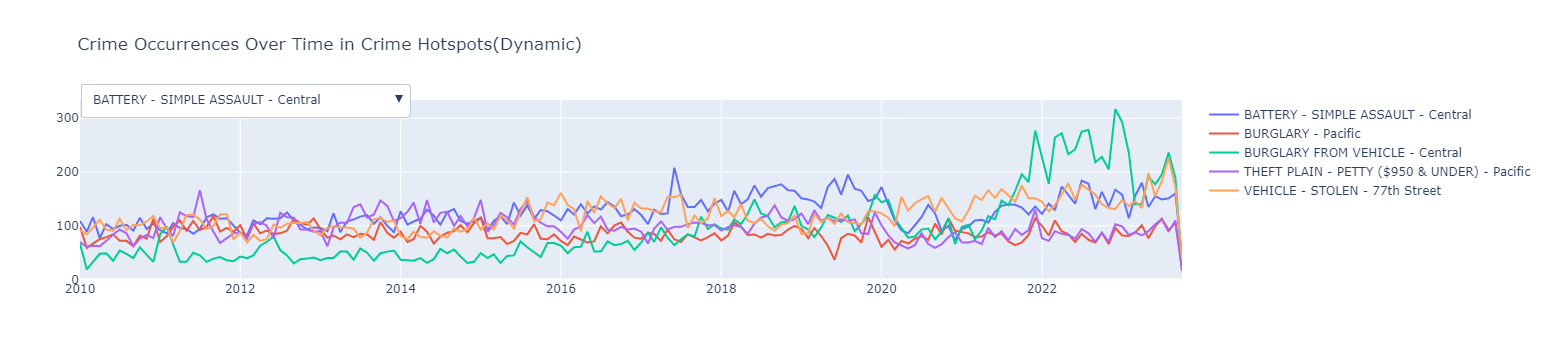

In [21]:
# Find top 5 crimes that has the highest occurences
top_5_crimes = la_2010_2023_df.groupby('Crm Cd Desc').size().reset_index(name='occurrences').sort_values('occurrences', ascending= False).head(5)

# find the total number of incidents for each crime type in all the areas
crime_hotspot_areas = la_2010_2023_df.groupby(['Crm Cd Desc', 'AREA NAME']).size().reset_index(name='occurrences').sort_values('occurrences', ascending= False).drop_duplicates(subset='Crm Cd Desc')

# Filter 'crime_hotspot_areas' to have only the top 5 crimes obtained from 'top_5_crimes'
top_crime_hotspot_areas = crime_hotspot_areas[crime_hotspot_areas['Crm Cd Desc'].isin(top_5_crimes['Crm Cd Desc'])]
#top_crime_hotspot_areas.reset_index(drop = True)

# Merge 'crime_hotspot_areas' with the main dataset for timeseries plot
# Filter main dataset to have values of the top 5 crimes and the area with the highest occurences for the crime
area_to_plot = la_2010_2023_df.merge(top_crime_hotspot_areas[['Crm Cd Desc', 'AREA NAME']], on=['Crm Cd Desc', 'AREA NAME'])
area_to_plot = area_to_plot.groupby(['Crm Cd Desc', 'AREA NAME','M_Year']).size().reset_index(name='occurrences')

# Timeseries plot
# Create traces for each crime type
traces = []

# Create timeseries plot for each crime type
for crime_type, data in area_to_plot.groupby(['Crm Cd Desc', 'AREA NAME']):
    trace = go.Scatter(x=data['M_Year'].astype(str),
                       y=data['occurrences'],
                       mode='lines',
                       name=f"{crime_type[0]} - {crime_type[1]}")

    # Add all the timeseries plot to the trace
    traces.append(trace)

# Create visibility list for each crime type - area
visible_traces = [[False] * len(traces) for _ in range(len(traces))]

# Create list for the dropdown menu
buttons = []
for i, trace in enumerate(traces):
    button = dict(args=[{'visible': visible_traces[i]}], label=trace.name, method='update')
    # Set the corresponding trace to be visible when its dropdown item is selected
    button['args'][0]['visible'][i] = True
    buttons.append(button)

# Define layout for the plot
layout = dict(title='Crime Occurrences Over Time in Crime Hotspots(Dynamic)',
              updatemenus=[dict(buttons=buttons,
                                direction='down',
                                pad={'r': 10, 't': 10},
                                showactive=True,
                                x=0,
                                xanchor='auto',
                                y=1.15,
                                yanchor='top')])

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Display the interactive plot
pio.show(fig)


##### Analysis of Trends Observed in Time Series Plots for Each Crime Type:

#### Battery, Simple Assault - Central:
- The spike in battery assaults in 2017 might have stemmed from social unrest or civil disturbances following events such as the **Rodney King Verdict Riot**.
- In 2020, the decline in battery assaults may have resulted from reduced social activities and movement due to **COVID-19** restrictions, leading to fewer opportunities for altercations.

#### Vehicle Theft - 77th Street Division:
- The **TikTok challenge** - Kia Boyz and Hot Wiring promoted the theft of Kia and Hyundai vehicles.
- These incidents led to vehicle thefts, especially considering the vehicles' reported vulnerability to hot-wiring in late 2021.

#### Theft Plain, Petty - Pacific:
- **Holiday and tourist seasons** may lead to spikes in theft due to increased crowds, providing more opportunities for opportunistic crimes in public spaces.
- **Proposition 47** might have contributed to the decrease in theft due to its reclassification of certain offenses from felonies to misdemeanors, potentially influencing overall crime trends.

#### Burglary from Vehicle - Central Division:
- The reduction of $870m in **police funding** might have affected law enforcement capabilities, potentially contributing to burglary from vehicles post-March 2021.

#### Burglary - Pacific Division:
- Seasonal spikes in burglary might coincide with increased **tourist activities** and **holiday seasons**, presenting more opportunities for burglaries.

The analysis provides valuable insights into the potential causes and influential factors behind the fluctuations in various crime types across different divisions in Los Angeles. They highlight how historical events, societal changes, legislative measures, and resource allocations can influence crime trends in specific geographic areas over time.

### Reccomendations based on Geospatial Analysis


1. **Community Engagement and Awareness**:
- Implement community outreach programs to raise awareness about crime prevention strategies, encourage reporting, and build trust between law enforcement and residents.
- Conduct educational campaigns during peak tourist and holiday seasons, emphasizing vigilance against theft and burglary.

2. **Resource Allocation and Policing Strategies**:
- Address resource challenges in high-crime areas by reallocating resources or increasing support for divisions facing historical crime trends, such as the 77th Street Division.
- Develop targeted policing strategies focusing on crime hotspots within these divisions, utilizing data-driven approaches and increased patrols during high-crime periods.

3. **Division-Specific Recommendations**:

   3.1. **Central Division (Battery, Simple Assault)**:
   
        - Enhance community-police partnerships and programs to de-escalate tensions, improve conflict resolution, and reduce   altercations in densely populated and entertainment-centric areas.
        

   3.2. **77th Street Division (Vehicle Theft)**:
   
        - Increase efforts to dismantle criminal networks through targeted law enforcement initiatives.
        - Collaborate with automobile manufacturers to address vehicle vulnerabilities and raise public awareness about securing vehicles.
        

   3.3. **Pacific Division (Theft Plain - Petty, Burglary)**:
        
        - Strengthen community watch programs and surveillance during peak tourist seasons to deter opportunistic thefts and burglaries.
        - Continue community engagement to educate residents and tourists on securing their belongings and homes.

## Premises Analysis ##

In our look at Los Angeles, we got our hands on a bunch of information about crimes, schools, and malls. By putting this info on a map with different colors, we found some interesting stuff about where crimes happen around schools and malls. This helps us understand safety better.

As we go through all this data, we want to share useful insights about how safe different areas in Los Angeles are. We are checking for any noticeable patterns or things that stand out. The goal is to help people living here, parents, and even visitors to make more informed decisions about safety in Los Angeles. So, let's dive into the details and see what we can find!

In [22]:
#Formatting longitude using Web Mercator projection
def longitude_conversion(lon):
    return (lon * 20037508.34 / 180)

#Formatting latitude using Web Mercator projection
def latitude_conversion(lat):
    return (math.log(math.tan((90 + lat) * math.pi / 360)) / (math.pi / 180)) * (20037508.34 / 180)

#Filter out null values
la_2010_2023_df=la_2010_2023_df[la_2010_2023_df['LAT']!=np.nan]

# Format Latitude and Longitude
la_2010_2023_df['Longitude_conv']=la_2010_2023_df['LON'].apply(longitude_conversion)
la_2010_2023_df['Latitude_conv']=la_2010_2023_df['LAT'].apply(latitude_conversion)


### Filtering Targeted crimes in Los Angeles


We are concentrating on a certain group of Los Angeles crimes that have particular traits. Our criteria cover attacks in which the victim is male identifies as Hispanic (of "H" heritage), and is between the ages of 20 and 40. Furthermore, we are focusing on crimes expressly classified as `ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT`.

Our goal is to have a deeper understanding of a subset of crimes that might exhibit common patterns or trends by focusing on these specific offenses. Through this targeted research, we are able to identify patterns within the larger Los Angeles crime dataset that are relevant to a particular population and kind of crime.


In [23]:
# Filter the DataFrame 'la_2010_2023_df' to include only rows corresponding to targeted crimes
targeted_crimes_df = la_2010_2023_df[
    (la_2010_2023_df['Vict Age']>=20) & (la_2010_2023_df['Vict Age']<=40)&
    
    (la_2010_2023_df['Vict Descent']=='H')&
    
    (la_2010_2023_df['Vict Sex']=='M')& 
    
    (la_2010_2023_df['Crm Cd Desc']=='ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT')
]
targeted_crimes=targeted_crimes_df.copy()

#Replacing null values with '0' and converting the column to integer datatype
targeted_crimes['Weapon Used Cd'].fillna(0,inplace=True)
targeted_crimes['Weapon Used Cd']=targeted_crimes['Weapon Used Cd'].astype(int)

### Categorizing the Weapon Types

We've developed a function for categorizing firearms utilized for particular Los Angeles crimes into categories. Upon getting a weapon code as input, the method applies established criteria to assign the code to a more general `Weapon Category`.


`Gun/Weapon`:Firearms and related weapons
`Knife/Axe`:Edged weapons like knives and axes
`Blunt Instrument`:Objects designed to cause blunt force
`Unknown Weapon`:Cases where the weapon is unidentified
`Explosive Device`:Instances involving explosive devices
`Martial Arts Weapons`:Weapons associated with martial arts


The goal of this classification is to simplify the examination and offer a clearer representation of the kinds of weapons utilized in these particular crimes.


In [24]:
#Function to map Weapon used with Weapon Category
def map_weapon_category(weapon_code):
    if weapon_code in range(100, 125):
        return 'Gun/Weapon'
    elif weapon_code in range(200, 224) and weapon_code not in [212,221]:
        return 'Knife/Axe'
    elif weapon_code==212:
        return 'Bottle'
    elif weapon_code==221:
        return 'Glass'
    elif weapon_code==302:
        return 'Blunt Instrument'
    elif weapon_code==303:
        return 'Brass Knuckles'
    elif weapon_code==304:
        return 'Bat'
    elif weapon_code==305:
        return 'Fixed Object'
    elif weapon_code==306:
        return 'Rock'
    elif weapon_code==307:
        return 'Vehicle'
    elif weapon_code==308:
        return 'Stick'
    elif weapon_code==309:
        return 'Board'
    elif weapon_code==310:
        return 'Brick'
    elif weapon_code == 311:
        return 'Hammer'
    elif weapon_code==312:
        return 'Pipe'
    elif weapon_code==400:
        return 'Strong Arm'
    elif weapon_code==500:
        return 'Unknown Weapon'
    elif weapon_code==502:
        return 'Bow and Arrow'
    elif weapon_code==503:
        return 'Poison'
    elif weapon_code==505:
        return 'Explosive Device'
    elif weapon_code==506:
        return 'Fire'
    elif weapon_code==507:
        return 'Liquor/Drugs'
    elif weapon_code==508:
        return 'Martial Arts Weapons'
    elif weapon_code==509:
        return 'Rope'
    elif weapon_code==510:
        return 'Scalding Liquid'
    elif weapon_code==511:
        return 'Verbal Threat'
    elif weapon_code==512:
        return 'Pepper Spray'
    elif weapon_code==513:
        return 'Stun Gun'
    elif weapon_code==514:
        return 'Tire Iron'
    elif weapon_code==515:
        return 'Physical Presence'
    elif weapon_code==516:
        return 'Dog'
    else:
        return 'Unknown'

#Apply the function to create the 'Weapon Category' column
targeted_crimes['Weapon Category']=targeted_crimes['Weapon Used Cd'].apply(map_weapon_category)
targeted_crimes[['Weapon Used Cd','Weapon Desc','Weapon Category']]

Weapon Used Cd                                     Weapon Desc  \
8                  400  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
40                 400  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
99                 308                                           STICK   
104                500                     UNKNOWN WEAPON/OTHER WEAPON   
129                400  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
...                ...                                             ...   
815474             102                                        HAND GUN   
815641             102                                        HAND GUN   
815706             102                                        HAND GUN   
815720             102                                        HAND GUN   
815767             500                     UNKNOWN WEAPON/OTHER WEAPON   

       Weapon Category  
8           Strong Arm  
40          Strong Arm  
99               Stick  
104     Unknown Weapon  
129         Strong Arm  
...                ...  
815474      Gun/Weapon  
815641      Gun/Weapon  
815706      Gun/Weapon  
815720      Gun/Weapon  
815767  Unknown Weapon  

[30007 rows x 3 columns]

### Mapping School Locations

We obtained information on  Los Angeles school sites from a file that was tab-delimited and was provided to us by LAUSD:http://www.lausd.k12.ca.us/lausd/offices/bulletins/lausd.tab. We have included latitude and longitude information for every institution to enhance our analysis. For the purpose of recognizing and understanding the geographic location of schools in the city, these geographical details will be essential.

### Schools Locations Columns Information

The data set for schools can be found here: https://www.lausd.org/Page/7704

1. `Cost Center Code`: This is a unique identifier for each school or education center in the Los Angeles Unified School District (LAUSD).

2. `School`: This is the name of the school or education center.

3. `Address`: This is the street address of the school or education center.

4. `City`: This is the city where the school or education center is located.

5. `State`: This is the state where the school or education center is located.

6. `Zip Code`: This is the postal zip code for the school or education center.

7. `Telephone`: This is the main telephone contact number for the school or education center.

8. `Fax`: This is the fax number for the school or education center.

9. `Grades`: This indicates the grade levels that the school or education center serves. For example, "K-5" means the school serves Kindergarten through 5th grade.

10. `Local District`: This is the local district within the LAUSD that the school or education center belongs to.

11. `Board District`: This is the board district within the LAUSD that the school or education center belongs to.

12. `File Build Date`: This is the date when the data file was created or last updated.


We did this by geocoding the schools according to their zip codes using the MapBox API. The process included converting zip codes into latitude and longitude data so that the location of each school could be shown more precisely.


With this geolocation data, we can now more effectively combine school data with our broader study, which may reveal trends or correlations pertaining to criminal incidences close to educational facilities.

In [25]:
#Read the tab-delimited data about location of schools
url="http://www.lausd.k12.ca.us/lausd/offices/bulletins/lausd.tab"
schools=pd.read_csv(url, delimiter='\t')

#Set up your Mapbox API key
mapbox_api_key="pk.eyJ1IjoiY21hcmNpYW4iLCJhIjoiY2xwdWRmdDM4MGl0ZDJpbTh6eDB1ZnM3MCJ9.iTR6LOJyWLN4H1TgRHtrKw"

# Create a MapBox geocoder object
geocoder=MapBox(api_key=mapbox_api_key)

# Function to get latitude and longitude for a given zip code
def get_lat_long(zipcode):
    # Ensure that the zip code is a string
    zipcode_str=str(zipcode)
    location=geocoder.geocode(zipcode_str, country='US')
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None
    
# Format school datset    
schools['Latitude'], schools['Longitude'] = zip(*schools['Zip Code'].apply(get_lat_long).tolist())
schools.head(5)

Cost Center Code  Legacy Code  \
0           1954501         9545   
1           1223101         2231   
2           1585701         5857   
3           1585702         5858   
4           1583601         5836   

                                              School                Address  \
0                102nd Street Early Education Center        1925 E 102nd St   
1           107th Street Cal State Preschool Program         147 E 107th St   
2                            107th Street Elementary         147 E 107th St   
3  107th Street Elementary Science/Tech/Eng/Arts/...         147 E 107th St   
4                            109th Street Elementary  10915 S Mc Kinley Ave   

          City State  Zip Code     Telephone           Fax Grades Calendar  \
0  Los Angeles    CA     90002  323-569-8159  323-569-0446    NaN      NaN   
1  Los Angeles    CA     90003  323-756-8137  323-779-6942    NaN      NaN   
2  Los Angeles    CA     90003  323-756-8137  323-779-6942   K- 5    1 Trk   
3  Los Angeles    CA     90003  323-756-8137  323-779-6942   K- 5    1 Trk   
4  Los Angeles    CA     90059  323-756-9206  323-755-2307   K- 5    1 Trk   

  Local District          Board District File Build Date   Latitude  \
0              S  7-Tanya Ortiz Franklin      2023-12-06  33.942828   
1              S  7-Tanya Ortiz Franklin      2023-12-06  33.966051   
2              S  7-Tanya Ortiz Franklin      2023-12-06  33.966051   
3              S  7-Tanya Ortiz Franklin      2023-12-06  33.966051   
4              S  7-Tanya Ortiz Franklin      2023-12-06  33.932268   

    Longitude  
0 -118.246711  
1 -118.272687  
2 -118.272687  
3 -118.272687  
4 -118.243469

In [26]:
#converting the date column from string format to datetime format
targeted_crimes['DATE OCC'] = pd.to_datetime(targeted_crimes['DATE OCC'])

#get the day name(i.e sunday/monday etc) from the given date
targeted_crimes['Day of Week'] = targeted_crimes['DATE OCC'].dt.day_name()

# Group by 'Day of Week' and get the count of unique DR_NO values
day_of_week_counts = targeted_crimes.groupby('Day of Week')['DR_NO'].nunique().reset_index(name='Count')

### Mapping Mall Locations

we got the data for malls from https://www.cbsnews.com/losangeles/news/best-shopping-malls-in-the-los-angeles-area/ and saved it to a CSV file. we have generated latitude and longitude from the given zipcode as this information will be crucial for visualizing the shopping centers on a map for geographic analysis.

To get this, we've used the MapBox API to geocode the malls based on their zip codes. By converting zip codes into latitude and longitude coordinates, we are able to pinpoint each mall's location.


### Shopping Malls Locations Columns Information

The data for the best shopping malls in the Los Angeles area can be found here: https://www.cbsnews.com/losangeles/news/best-shopping-malls-in-the-los-angeles-area/

1. `Mall Name`:The name of the shopping mall

2. `Address`:The full address of the shopping mall

3. `Zipcode`:The zip code where it is located

In [27]:
malls=pd.read_csv('Malls in LA.csv')

def get_lat_long_from_zip(zipcode, mapbox_access_token):
    geolocator = MapBox(api_key=mapbox_access_token)

    location = geolocator.geocode(f'{zipcode}, United States')

    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None

mapbox_access_token ='pk.eyJ1IjoicHJhbmF0aGl2YWRyZXZ1IiwiYSI6ImNscDR0ZzR1ZDE2bjYybnQyeTYyZzJ0cnEifQ.gMOXVyJq6ZA0MUM5jX-IxA'

#Create new columns for latitude and longitude
malls['Latitude']=None
malls['Longitude']=None

#Iterate through the DataFrame and populate the latitude and longitude columns
for index, row in malls.iterrows():
    zipcode = row['Zipcode']
    result = get_lat_long_from_zip(zipcode,mapbox_access_token)

    if result is not None:
        latitude,longitude = result
        malls.at[index,'Latitude']=latitude
        malls.at[index,'Longitude']=longitude

malls.head(5)

Mall Name                                            Address  \
0               The Grove            189 The Grove Dr, Los Angeles, CA 90036   
1  Westfield Century City     10250 Santa Monica Blvd, Los Angeles, CA 90067   
2       South Coast Plaza              3333 Bristol St, Costa Mesa, CA 92626   
3  Third Street Promenade  1351 3rd Street Promenade, Santa Monica, CA 90401   
4    Hollywood & Highland  6801 Hollywood Boulevard 170, Los Angeles, CA ...   

   Zipcode   Latitude   Longitude  
0    90036  34.061912  -118.34544  
1    90067    34.0595  -118.41946  
2    92626  33.663339 -117.903317  
3    90401   34.01947 -118.491227  
4    90028  34.100158 -118.331437

In [28]:
#get the count of each weapon category
targeted_crimes['Weapon Category'].unique()

array(['Strong Arm', 'Stick', 'Unknown Weapon', 'Knife/Axe', 'Board',
       'Blunt Instrument', 'Vehicle', 'Bottle', 'Bat', 'Gun/Weapon',
       'Rock', 'Brass Knuckles', 'Verbal Threat', 'Explosive Device',
       'Fixed Object', 'Martial Arts Weapons', 'Pepper Spray',
       'Tire Iron', 'Unknown', 'Poison', 'Brick', 'Glass', 'Stun Gun',
       'Hammer', 'Fire', 'Pipe', 'Bow and Arrow', 'Liquor/Drugs', 'Dog',
       'Physical Presence', 'Scalding Liquid', 'Rope'], dtype=object)

In [29]:
#filter by the weapon category
#change the value of the weapon category you can find them just above this cell to see the crimes below in the map based on weapon category
targeted_crimes_gun=targeted_crimes[targeted_crimes['Weapon Category']=='Gun/Weapon']

### Visualizing the premise specific crimes

In this interactive map, we combine the data on crime incidents, schools, and malls in Los Angeles to show a detailed view of their spatial distribution. Each element is represented by a distinct color.

**Crime Incidents(Red)**: Look for the locations of specific incidents, especially ones that include guns. To get information about the weapon category connected to the incident, hover your cursor over each marker.

**Schools(Blue)**: Find out where the city's schools are located To get the name of each school, hover your cursor over the marker.

**Malls(Green)**: Map out where Los Angeles's retail centers are located. To get the name of a particular mall, hover over each marker.

An improved use of the geographical relationships among these items is made possible by the map, which provides valuable insights into their close proximity. Please use the map's interactive features to pan, zoom in, and explore certain regions of interest. The purpose of this visualization is to shed light on the spatial patterns of the city's criminal activity hubs.

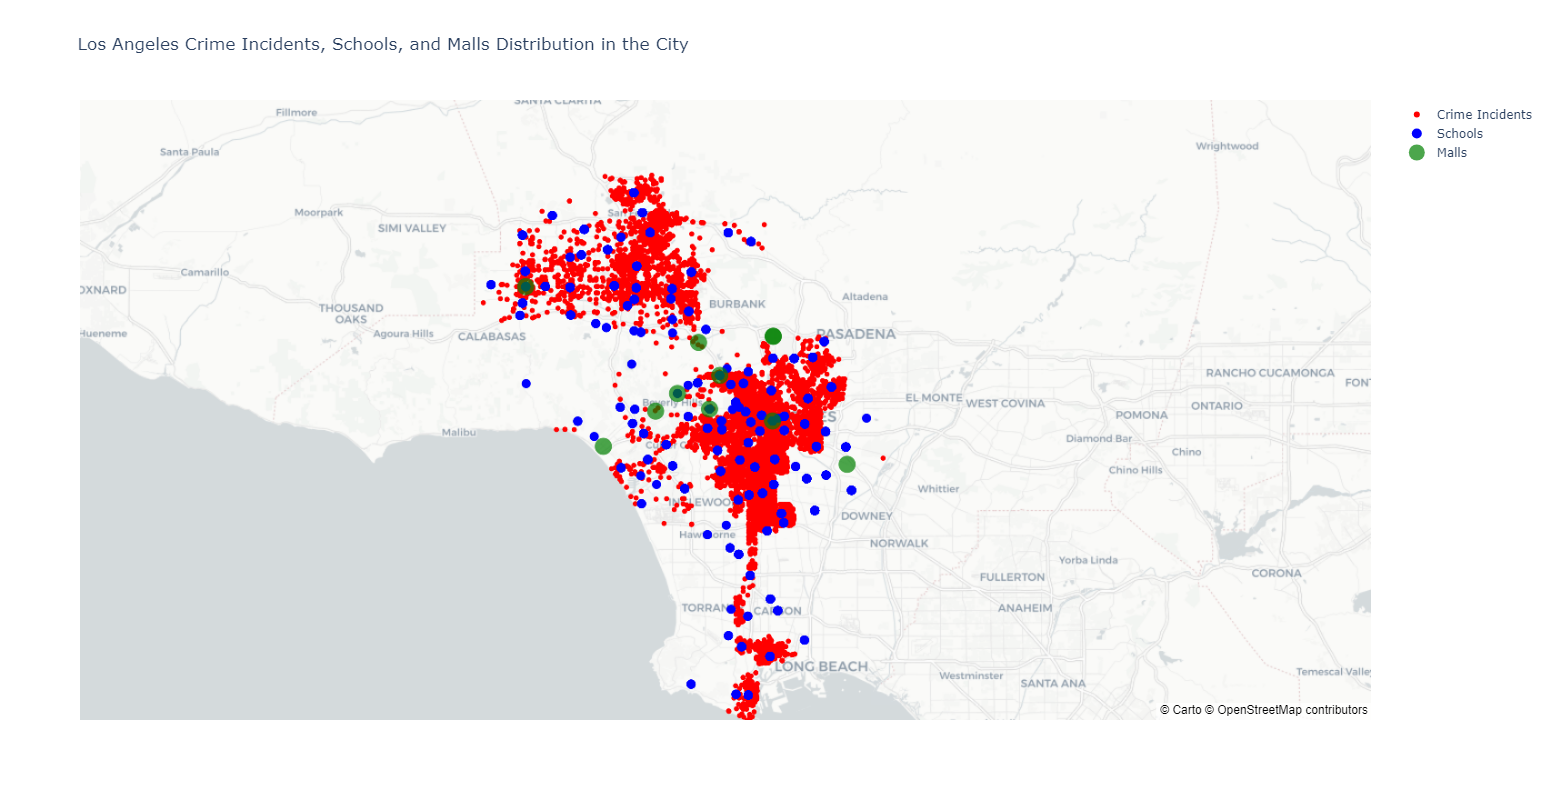

In [30]:
#Mapping latitudes and longitudes to premise specific analysis 
crime_latitude_column='LAT'
crime_longitude_column='LON'

schools_latitude_column='Latitude'
schools_longitude_column='Longitude'

malls_latitude_column='Latitude'
malls_longitude_column='Longitude'

#Set up your Mapbox API key
mapbox_api_key="pk.eyJ1IjoicHJhbmF0aGl2YWRyZXZ1IiwiYSI6ImNscDR0ZzR1ZDE2bjYybnQyeTYyZzJ0cnEifQ.gMOXVyJq6ZA0MUM5jX-IxA"

#Create a scattermapbox visualization
fig=go.Figure()

#Add a trace for crime incidents
fig.add_trace(go.Scattermapbox(
lat=targeted_crimes_gun[crime_latitude_column],
lon=targeted_crimes_gun[crime_longitude_column],
mode='markers',
marker=dict(size=6,color='red',),
hovertext=targeted_crimes_gun['Weapon Category'],
hoverinfo='text',
name='Crime Incidents',))


# Add a trace for schools 
fig.add_trace(
go.Scattermapbox(
lat=schools[schools_latitude_column],
lon=schools[schools_longitude_column],
mode='markers',
marker=dict(size=10,color='blue'),
hovertext=schools['School'],
hoverinfo='text',name='Schools',))


# Add a trace for malls
fig.add_trace(
go.Scattermapbox(lat=malls[malls_latitude_column],
lon=malls[malls_longitude_column],
mode='markers',
marker=dict(size=18,color='green',opacity=0.7,),
hovertext=malls['Mall Name'],
hoverinfo='text',
name='Malls',))

# Set the mapbox style and token
fig.update_layout(
title_text="Los Angeles Crime Incidents, Schools, and Malls Distribution in the City",
mapbox_style="carto-positron",
mapbox_accesstoken=mapbox_api_key,
mapbox=dict(
center=dict(
lat=(targeted_crimes[crime_latitude_column].mean() + schools[schools_latitude_column].mean() + malls[malls_latitude_column].mean()) / 3,
lon=(targeted_crimes[crime_longitude_column].mean() + schools[schools_longitude_column].mean() + malls[malls_longitude_column].mean()) / 3
),
zoom=9, ),
height=800,
width=1050 )

#Show the plot
fig.show()


Los Angeles has various noticeable trends in crime distribution, particularly around schools and shopping centers. A color-coded map shows crimes in red, schools in blue, and shopping centers in green.

A clear pattern develops, showing a concentration of crimes involving firearms and weapons near school areas. The weapons used in the instances include semi-automatics, pistols, revolvers, rifles, and sawed-off rifles. Surprisingly, several schools appear to be outliers, with no documented gun incidents in the areas where the schools are located. Robert Hill Lane Elementary, Hilda L Solis Learning Academy, Woodlawn Avenue Elementary, and others are examples. This information may be critical for parents seeking to provide safer educational environments for their children.

As we have lately seen in the news, there is an increasing number of mentally ill individuals who carry guns and target schools, showing how important school safety is. Most of the 1624 schools in Los Angeles have a history of gun-related crimes. The above-mentioned exclusions offer some options for parents seeking schools with lower related risks.


A more thorough examination of Los Angeles' shopping centers reveals that generally speaking, most of them do not have a high crime rate. However, several malls—Westfield Topanga & The Village and Hollywood & Highland, in particular—stand out owing to a high number of gun-related incidents.When making judgments regarding the safety of shopping places, both locals and visitors may benefit greatly from using this information as a beneficial reference.


The analysis's finding of crimes using non-traditional weapons, such as bows and arrows, is an interesting feature. Even though it's not very common, if you encounter someone carrying a bow and arrow other than on Halloween or another special occasion, just run and hide somewhere secure. Furthermore, explosive device-related crimes are comparatively rare but are centered in Downtown Los Angeles.

The fact that crimes tend to occur on Sundays and Saturdays is an important finding. It is urged that weekend visitors to Los Angeles take care while making travel plans. For individuals making travel plans to the city, using the data supplied to pinpoint safer locations becomes very important.

In addition to crimes involving firearms, there are notable events involving knives and axes. One place where these kinds of situations seem to occur more frequently is Venice Beach. It is highly suggested that visitors be cautious and carry pepper spray for their own personal protection in certain regions.


## Crime Rate Across Various Seasons

Analyzing crime rates across various seasons is essential for understanding the temporal patterns and dynamics of criminal activities. This analysis can provide valuable insights into how crime rates fluctuate throughout the year, allowing law enforcement agencies, policymakers, and researchers to make informed decisions and implement targeted interventions.

### Key Reasons for Conducting the Analysis:
Temporal Patterns: Seasons often influence human behavior, and studying crime rates across seasons can reveal patterns related to weather, holidays, and other seasonal factors. For example, there might be an increase in certain types of crimes during holidays or warmer months.

Resource Allocation: Law enforcement agencies can use the insights gained from this analysis to allocate resources more efficiently. For instance, during periods with historically higher crime rates, authorities may choose to increase patrols or implement specific crime prevention strategies.

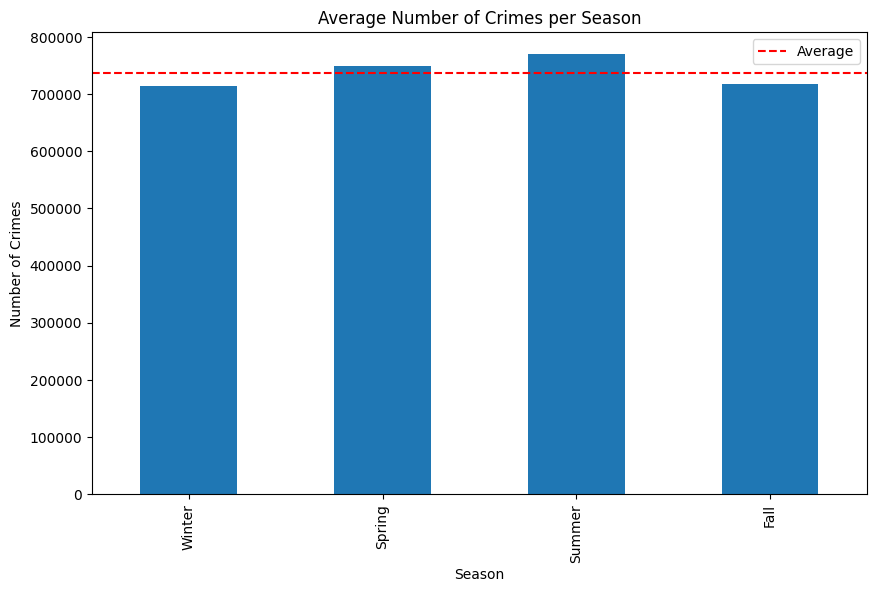

In [31]:
la_2010_2023_df['Month'] = la_2010_2023_df['DATE OCC'].dt.month

# Creating dictionary to map month with seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

# Adding season to the dataset
la_2010_2023_df['Season'] = la_2010_2023_df['Month'].map(season_mapping)
average_crimes_per_season = la_2010_2023_df.groupby('Season').size().mean()

# Plot the average number of crimes per season
plt.figure(figsize=(10, 6))
la_2010_2023_df.groupby('Season').size().plot(kind='bar')
plt.axhline(average_crimes_per_season, color='red', linestyle='--', label='Average')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.title('Average Number of Crimes per Season')

# Set the x-axis tick labels to the season names
season_names = ['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(range(4), season_names)

# Display the graph
plt.legend()
plt.show()


A striking revelation emerges as we delve into the fall and winter months, where the incidence of reported crimes significantly dips below the annual average. In stark contrast, the spring and summer seasons exhibit a surge in criminal activities, prompting a closer investigation into the contributing factors.

### Tourism Influence
Los Angeles, a global tourism hub, experiences a substantial uptick in visitor numbers during the spring and summer seasons. This correlation prompts a critical examination of the interplay between tourism dynamics and crime rates. The influx of tourists, while vital for the city's economy, appears to coincide with an observable spike in reported crimes during these warmer months.

### Validating with the Bureau of Justice Statistics
The findings of our analysis align seamlessly with a pivotal survey conducted by the Bureau of Justice Statistics in 2014. This survey sheds light on a compelling correlation between rising temperatures and an escalation in crime rates. The Bureau's report states that the heat-aggression link is a significant contributing factor. As temperatures soar, the physiological effects of increased body temperature, elevated heart rates, and heightened blood pressure create a conducive environment for heightened aggression, potentially translating into a surge in criminal incidents.

Heat as a Catalyst for Aggression:
Our analysis serves as evidence supporting piece to the Bureau's survey, reinforcing the understanding that hot weather acts as a catalyst for increased aggression. The physiological responses triggered by elevated temperatures, combined with the influx of tourists during the spring and summer, create a milieu where tensions are more likely to escalate, contributing to the observed uptick in crime rates during these seasons.

## Crime Prevention Funds

**Crime Prevention Funds** are an important source of funds dedicated to the improvement of the crime rates within the community. These funds will be through different programs and initiatives and will be collectively aimed at preventing and aiding in addressing crimes in the community. 

### Purpose and Goals

The principal objectives of these Crime Prevention funds are as follows:

- **Community Engagement:** Encouraging the involvement of the community and prompting them to collaborate in aid of crime prevention initiatives.


- **Supporting Law Enforcement:** Allocation of resources and funds to assist law enforcement bodies to prevent happenings of crime


- **Education and Awareness:** Raising education and awareness among the public about the strategies involving the methodologies of crime prevention programs.


- **Youth Programs:** Organizing and facilitating youth programs that help empower the juvenile population to guide them not to be involved in criminal activities.

### How Crime Prevention Funds Affected The Time Difference Between The Time Reported & Time Occurred For The Crimes

By looking at all the crime prevention funds, a lot of it focussed on improving technology such as body-worn cameras(BWCs, Vehicle Number Detection Cameras, Advanced monitoring systems, etc.). So what technology offers is a reduction in reporting time, this is further supported by the following,

The use of body-worn cameras (BWCs) and other monitoring systems will lead to the improvement of better documentation of crimes since the officers can be able to document and verify the crime reports. This in turn will lead to the the reporting time getting short over time. Also, better surveillance devices will help in targeting the focused criminal with ease. Thus, the inclusion of technology funded by these grant funds ultimately may improve the reporting time of the crimes.

So, to analyze if this improvement by allotting the funds has any impact on the reduction in reporting time,
we are determining **"Relationship Between Crime Prevention Grant Funding & Average Difference in Reporting Time And Occurred Time Of Crimes Over The Years"**

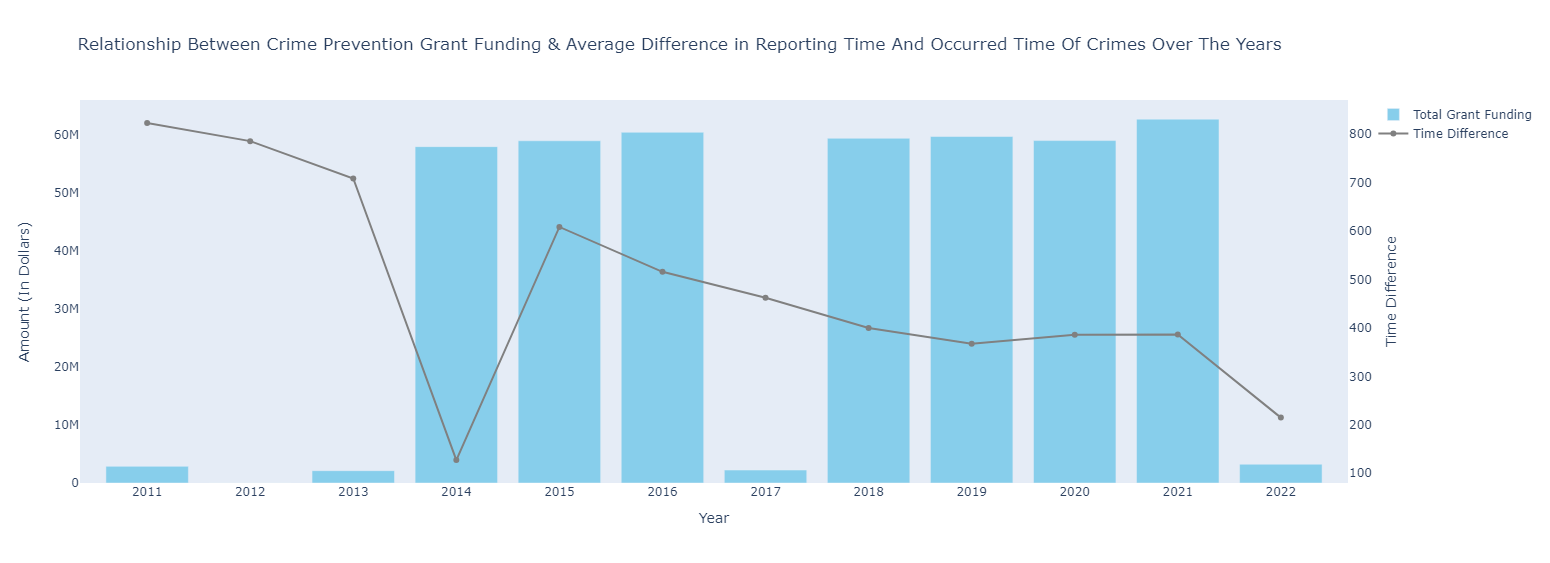

In [32]:
# year values format for the twin chart
grant_funding_df['Year']=pd.to_datetime(grant_funding_df['StartDate']).dt.year

# amount values format for the twin chart
grant_funding_df['Amount']=grant_funding_df['Amount'].astype('float')
grant_funding_df=grant_funding_df[grant_funding_df['Amount'].notna()]
grant_funding_df['Amount']=grant_funding_df['Amount'].astype('int')

# funding per year dataframe for plot
gdf_amount_per_year=grant_funding_df.groupby(by='Year')['Amount'].sum().to_frame().reset_index()

# average time difference in reporting time and occurred time of crime per year dataframe for plot
la_2010_2023_df['Date Rptd']=pd.to_datetime(la_2010_2023_df['Date Rptd'])
la_2010_2023_df['ReportingTimeDifference']=(la_2010_2023_df['Date Rptd'] - la_2010_2023_df['DATE OCC']).dt.total_seconds() / 3600  # Difference in hours
average_time_per_year = la_2010_2023_df.groupby(la_2010_2023_df['DATE OCC'].dt.year)['ReportingTimeDifference'].mean()
average_time_per_year=average_time_per_year.to_frame().reset_index()
average_time_per_year=average_time_per_year.rename(columns={'DATE OCC': 'Year', 'ReportingTimeDifference': 'Time Difference'})

# merged avg diff and avg time per year datatframe for the plot
avg_diff_and_funds_per_year = gdf_amount_per_year.merge(average_time_per_year, on='Year')

# Create a bar trace for the 'Total Grant Funding' data
bar_trace = go.Bar(x=avg_diff_and_funds_per_year['Year'], y=avg_diff_and_funds_per_year['Amount'], name='Total Grant Funding', marker=dict(color='skyblue'))

# Create a line trace for the 'Time Difference' data
line_trace = go.Scatter(x=avg_diff_and_funds_per_year['Year'], y=avg_diff_and_funds_per_year['Time Difference'], name='Time Difference', mode='lines+markers', yaxis='y2', line=dict(color='gray'))

# Define hover templates for the traces to display information on hover
bar_trace.hovertemplate = 'Year: %{x}<br>Amount: $%{y:.1f}'
line_trace.hovertemplate = 'Year: %{x}<br>Time Difference: %{y:.0f}'
layout = go.Layout(
    title='Relationship Between Crime Prevention Grant Funding & Average Difference in Reporting Time And Occurred Time Of Crimes Over The Years',
    yaxis=dict(title='Amount (In Dollars)', side='left', showgrid=False, zeroline=False, showline=False),
    yaxis2=dict(title='Time Difference', overlaying='y', side='right', showgrid=False, zeroline=False, showline=False),
    xaxis=dict(title='Year', tickvals=avg_diff_and_funds_per_year['Year']),
    showlegend=True,
    height=450 * 1.25
)
fig = go.Figure(data=[bar_trace, line_trace], layout=layout)
fig.show()

There has been a reduction in reporting time from 2011 to 2013, indicating that the initial trial installments of the crime prevention funds were a success. This success in the crime funding programs may have influenced the government to put more money into these kinds of initiatives.


From the success of the initial grant funds, the sudden reduction in average report time during 2014 may suggest that the introduction of numerous technologies that are associated with the increased grant fund over the years of 2014 to 2016, may have helped the authorities to target the crimes with ease, corner the hate groups and ultimately finding the source of the crimes and addressing it from the root level.


However, the unexpected rise in 2015 could be the result of the mass outbreak of crimes in LA in 2015 which will be notably researched in our analysis.


After the 2015 calamities, the steady funding from 2015 to 2019 with the exception in 2017 ensured that the justice department took control of the crimes and its driving factor.

However, the control of these stable environments took a turn leading to an increase in reporting time in 2020 despite the heavy funding, This could be due to the COVID-19 situation where most of the people were limited to their own place and there was a mass number of crime enforcement bodies who could not work in utmost efficiency with the funding they got. Leading to ineffective crime measures, initiatives, and other factors that disfavoured the crime identification process.

### Despite The Streams of Funding, What Happened to LA In 2015!!!



- In 2015, Los Angeles faced a confluence of social and economic challenges that contributed to higher crime rates despite sufficient crime prevention funding. Lack of job opportunities and community support, especially in underprivileged areas, likely pushed individuals towards criminal activities. The rise in homelessness and widening socio-economic disparities further strained law enforcement resources, causing delays in crime reporting times.

- Policing strategies, although advanced, struggled to keep pace with the evolving landscape of crime. The shift in drug use patterns led to more complex criminal activities, and legal changes like Proposition 47, which reduced penalties for certain crimes, may have inadvertently increased property crimes. These factors overwhelmed police efforts, contributing to longer reporting times.

- In sum, while crime prevention funds were available in 2015, economic conditions and drug use patterns to legal changes and policing strategies—likely diluted the impact of these funds. This leads to a case where the increasing funding may not directly lead to improvements in crime rates or reporting times without a holistic approach that addresses the root causes and adapts to the dynamic nature of urban crime.

## Crime Prediction in the Los Angeles Region

In this segment, we aim to leverage statistical modeling techniques for time series forecasting to predict the number of crimes in the Los Angeles region. The ability to anticipate crime trends is a valuable asset for law enforcement and public policy agencies, allowing for proactive measures in crime prevention and public safety enhancement.

### Objectives:

- **Analyzing Historical Crime Data**: We'll start by examining historical crime data to understand past trends and patterns.
- **Modeling Crime Trends with SARIMA**: Utilizing the Seasonal AutoRegressive Integrated Moving Average (SARIMA) model, we'll fit the historical data to capture both the seasonal patterns and non-stationary trends in crime occurrences.
- **Forecasting Future Crime Rates**: By applying the SARIMA model, we'll forecast crime rates for upcoming months. This will give us an estimate of future crime occurrences.
- **Strategic Planning and Resource Allocation**: The forecasts will be instrumental in strategic planning for law enforcement deployment and resource allocation. Predicting high-risk periods or areas can significantly improve preparedness and response strategies.


Through predictive modeling, we strive to contribute to the safety and well-being of the Los Angeles community by providing actionable insights derived from data.

In [33]:
# Extracting time periods from 'DATE OCC'
la_2010_2023_df['DATE OCC'] = pd.to_datetime(la_2010_2023_df['DATE OCC']) 
la_2010_2023_df['Month'] = la_2010_2023_df['DATE OCC'].dt.month 
la_2010_2023_df['Year'] = la_2010_2023_df['DATE OCC'].dt.year 
la_2010_2023_df['M_Year']= la_2010_2023_df['DATE OCC'].dt.to_period('M') 

In [34]:
# Finding number of crimes based on Month and Year
grouped_data = la_2010_2023_df.groupby('M_Year').size().reset_index(name='Number of Crimes')
grouped_data.set_index('M_Year', inplace=True)
grouped_data.index = grouped_data.index.to_timestamp()
grouped_data.index.freq = 'MS'

In [35]:
# Convert index to datetime
if not isinstance(grouped_data.index, pd.DatetimeIndex):
    grouped_data.index = pd.to_datetime(grouped_data.index)

# After ensuring it's a DatetimeIndex, try removing the timezone information again
grouped_data.index = grouped_data.index.tz_localize(None)
grouped_data = grouped_data.sort_index()


 ### Model Rationale

 We have chosen the SARIMA model to predict crime rates because it is the most suitable model used for prediction and forecasting from a time series dataset. SARIMA is particularly suitable for time series data prediction because it can model and forecast data that exhibit non-stationarity, trend, and seasonality. The integration of seasonal differencing allows SARIMA to handle seasonal patterns, a common feature in many time series datasets. This makes it a versatile tool for predicting future data points by capturing both the underlying trends and the seasonal fluctuations observed in historical data. We have used auto_arima a function in the pmdarima library that takes care of selecting the appropriate parameters instead of calculating them manually.
 
### Note on Data Coverage

The dataset currently utilized for our crime prediction model does not include data beyond July 2023. This is due to a gap in the available records for the latter part of the year. To ensure the robustness of our predictive analysis, we have excluded this period from our modeling process.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-375.890, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-317.584, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-349.480, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-348.160, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-319.583, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-343.528, Time=1.13 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-345.488, Time=0.88 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-383.894, Time=2.69 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-360.134, Time=2.33 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-381.009, Time=2.50 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-391.325, Time=2.19 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-349.231, Time=1.61 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-389.911, Time=2.04 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=-391.186, Time=2.13 sec
 ARIMA(3,1,2)(1,0,2

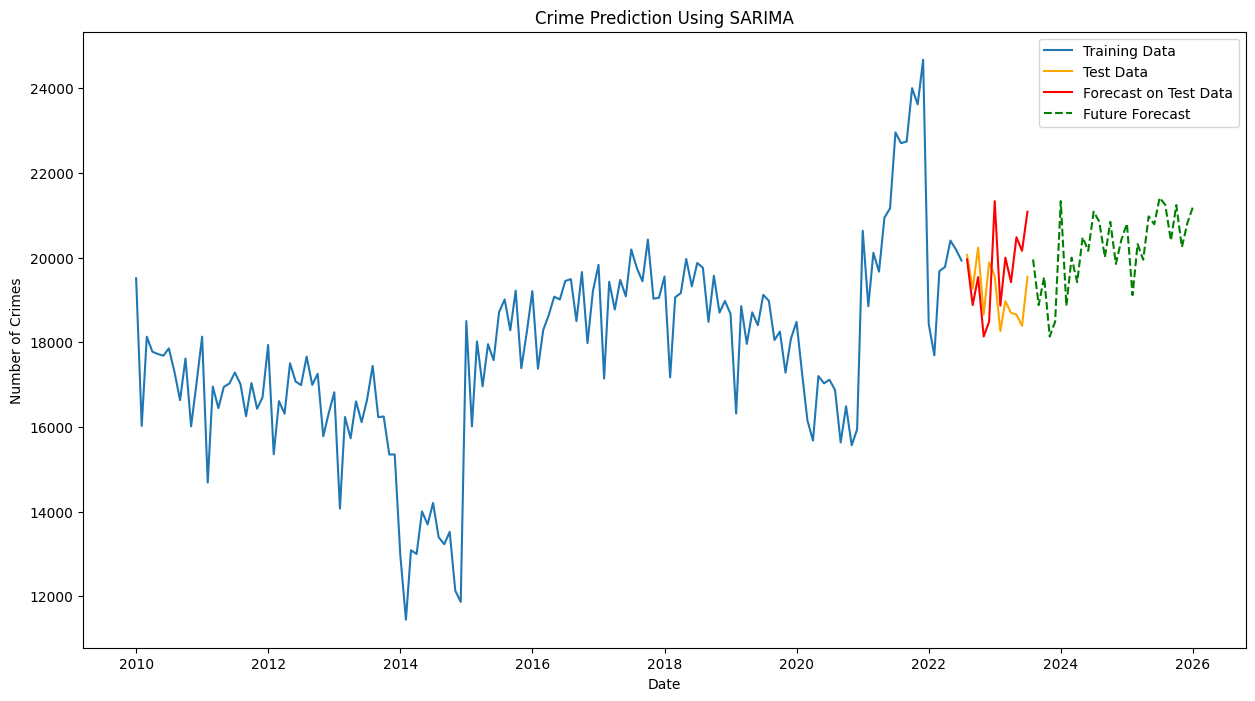

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Truncate the data before the structural break or outlier
cut_off_date = '2023-07-31'  # New cutoff date for modeling, not for forecasting
grouped_data = grouped_data[grouped_data.index <= cut_off_date]

# Handle any NaN values by forward filling
grouped_data['Number of Crimes'].fillna(method='ffill', inplace=True)

# Perform log transformation to stabilize the variance and mean
grouped_data['Log_Number_of_Crimes'] = np.log1p(grouped_data['Number of Crimes'])
# Define a cutoff date for the training dataset
train_cutoff_date = pd.to_datetime('2022-07-31')  # Adjust this as needed

# Split your dataset into training and test sets
train_data = grouped_data[grouped_data.index <= train_cutoff_date]
test_data = grouped_data[grouped_data.index > train_cutoff_date]

# Use auto_arima to find the best ARIMA model parameters on the log-transformed training data
auto_arima_model = auto_arima(train_data['Log_Number_of_Crimes'], 
                              seasonal=True, 
                              m=12, 
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True,
                              stepwise=True)

# Fit the SARIMA model on the log-transformed training data
fitted_model = SARIMAX(train_data['Log_Number_of_Crimes'], 
                       order=auto_arima_model.order, 
                       seasonal_order=auto_arima_model.seasonal_order).fit()

# Forecast the test data period
forecast_steps = len(test_data)  # The number of steps to forecast is the size of the test set
forecast_results = fitted_model.get_forecast(steps=forecast_steps)
forecast_log_mean = forecast_results.predicted_mean

# Invert the log transformation to get the forecast on the original scale
forecast_mean = np.expm1(forecast_log_mean)

# Calculate the error metrics using the test data
mae = mean_absolute_error(test_data['Number of Crimes'], forecast_mean)
mse = mean_squared_error(test_data['Number of Crimes'], forecast_mean)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Now forecast beyond the available data for the next 30 months
future_forecast_steps = 30
future_forecast = fitted_model.get_forecast(steps=future_forecast_steps)
future_forecast_index = pd.date_range(start=test_data.index[-1], periods=future_forecast_steps + 1, freq='MS')[1:]
future_forecast_log_mean = future_forecast.predicted_mean
future_forecast_mean = np.expm1(future_forecast_log_mean)

# Plot the historical data, test data, forecast, and future forecast
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data['Number of Crimes'], label='Training Data')
plt.plot(test_data.index, test_data['Number of Crimes'], label='Test Data', color='orange')
plt.plot(test_data.index, forecast_mean, label='Forecast on Test Data', color='red')
plt.plot(future_forecast_index, future_forecast_mean, label='Future Forecast', color='green', linestyle='--')
plt.title('Crime Prediction Using SARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

### RMSE (Root Mean Squared Error) explained in the context of our project.

RMSE is in the same units as the forecasted variable. If you're forecasting the number of crimes, an RMSE of 1183 means that the typical prediction by the model is off by 1183 crimes.

If the average number of crimes is around 20,000, an RMSE of 1183 is a relatively small proportion of this number (approximately 5.9%). This indicates that, while not perfect, the model's predictions are reasonably close to the actual numbers on average.

For stakeholders, RMSE provides a quantitative measure of the model's predictive accuracy, which can be crucial for planning and resource allocation. For instance, if the model's RMSE is within an acceptable range, the police department might use the forecasts to adjust staffing levels.

### Crime Prediction Analysis ###

The initial notable surge in crime rates occurred in 2015, potentially linked to regulatory changes enacted by Los Angeles County at the end of 2014. These changes, known as Proposition 47, modified penalties for certain crimes, including drug possession and some property offenses, which could explain the heightened crime rates in 2015.

Another significant increase in crime rates was observed in 2021, coinciding with a severe economic downturn. This period saw widespread job losses, potentially contributing to the rise in criminal activities.

The available data presents historical crime trends alongside predictive models. These predictions are illustrated by a red line, surrounded by a shaded red area representing the confidence interval of the forecast.

According to the prediction model, the trend in crime rates appears to be continuing. However, it's important to note that such forecasts do not guarantee future outcomes. Predicting crime rates over the next 30 months involves a degree of uncertainty, as it's impossible to precisely anticipate the myriad of factors that could influence global conditions and societal dynamics.

### Machine Learning Prediction: Value Add for Los Angeles

 1) Budget Planning: Accurate predictions can help with budgeting for law enforcement and community programs, ensuring funds are allocated where they are needed most.

 2) Community Trust: Transparency in sharing crime predictions can help build trust within the community as proactive steps are taken to mitigate crime.

 3) Evaluation of Interventions: By comparing predicted crime rates with actual figures, the effectiveness of law enforcement and crime prevention strategies can be evaluated and adjusted accordingly.

# Conclusions of "Digging Into Crime in LA" Project ###

## Overview of Findings ##

1. **Trends and Patterns in Crime Rates (2010-2023)**: Our data analysis showed significant fluctuations in crime rates over the years. We observed an increase in crime rates during and post-2020, correlating with the COVID-19 pandemic and associated economic impacts.

2. **Impact of High Spending on Policing**: By analyzing the grant funding data alongside crime rates, we found that higher spending on law enforcement didn't always correlate with lower crime rates. This suggests the need for a more complicated approach to crime reduction more than just financial investment in policing.

3. **Most Affected Demographics and Areas**: Our data analysis showed that certain age groups and areas were more prone to specific types of crimes. For instance, densely populated areas and those with higher tourist footfall reported higher incidences of theft and assault.

4. **Seasonal Variations in Crime Rates**: We noticed seasonal trends in crime occurrences, with higher rates during warmer months, aligning with increased social activities and tourism.

5. **Predictive Analysis for Future Crime Trends**: Using SARIMAX models, we predicted future crime trends, providing valuable insights for proactive crime prevention strategies.

## Why These Findings Matter ##

- **Informing Law Enforcement Strategies**: By identifying crime hotspots and demographic vulnerabilities, law enforcement can allocate resources more effectively and strategize targeted interventions.

- **Guiding City Planning and Public Policy**: Our findings can assist city planners in designing safer urban spaces and help policymakers in crafting community-specific crime prevention policies.

- **Public Awareness and Engagement**: By making this data accessible to the public, we promote community awareness and encourage proactive participation in crime prevention and safety measures.


# References

1. Sastry, A., & Bates, K. G. (2017, April 26). When LA Erupted In Anger: A Look Back At The Rodney King Riots. NPR.org; NPR. https://www.npr.org/2017/04/26/524744989/when-la-erupted-in-anger-a-look-back-at-the-rodney-king-riots
2. “TikTok Challenge Targeting Kia, Hyundai Vehicles Leads to Rise in Car Thefts, LAPD Chief Says.” ABC7 Los Angeles, 1 Sept. 2022, https://abc7.com/tiktok-challenge-lapd-kia-and-hyundai-thefts-chief-michel-moore/12185824/
3. “Proposition 47 and the BSCC.” Ca.gov, 2014, www.bscc.ca.gov/s_bsccprop47/
4. Levin, Sam. “These US Cities Defunded Police: “We’re Transferring Money to the Community.”” The Guardian, 7 Mar. 2021, www.theguardian.com/us-news/2021/mar/07/us-cities-defund-police-transferring-money-community
5. Johnson, A. (2023, July 10). Here’s why warm weather causes more violent crimes-from mass shootings to aggravated assault. Forbes. https://www.forbes.com/sites/ariannajohnson/2023/07/06/heres-why-warm-weather-causes-more-violent-crimes-from-mass-shootings-to-aggravated-assault/ 
. Los Angeles responds to rising 2015 crime rates. (n.d.). Christian Science Monitor, https://www.csmonitor.com/USA/USA-Update/2015/0709/Los-Angeles-responds-to-rising-2015-crime-rates
6. “2015 Was a Violent Year in Los Angeles - CBS News.” Www.cbsnews.com, 31 Dec. 2015, www.cbsnews.com/news/2015-was-a-violent-year-in-los-angeles/
7. Twitter, et al. “After a 12-Year Decline, Crime in L.A. Surges in First Half of 2015.” Los Angeles Times, 9 July 2015, www.latimes.com/local/lanow/la-me-ln-garcetti-beck-crime-increase-20150708-story.html
8. “Gang-Related, Domestic Violence Crimes Spike in Los Angeles.” Daily News, 13 Jan. 2016, www.dailynews.com/2016/01/13/gang-related-domestic-violence-crimes-spike-in-los-angeles/
9. “Best Shopping Malls in the Los Angeles Area - CBS Los Angeles.” Www.cbsnews.com, 4 Mar. 2018, www.cbsnews.com/losangeles/news/best-shopping-malls-in-the-los-angeles-area/
10. “Crime Data from 2010 to 2019 | Los Angeles - Open Data Portal.” Data.lacity.org, data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z
11. “Crime Data from 2020 to Present | Los Angeles - Open Data Portal.” Data.lacity.org, data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
12. “LAPD Divisions.” Geohub.lacity.org, geohub.lacity.org/datasets/lahub::lapd-divisions/about
13. “State Reporting Services Branch / School Listings.”, www.lausd.org/Page/7704